In [120]:
from xml.dom.minidom import parse
import xml.dom.minidom

import os
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

plt.style.use('seaborn-whitegrid')


In [2]:
# def apend2Dict(xDict, key=None, value=None):
#     assert key is not None and value is not None, 'key or value is None'
#     if key not in xDict:
#         xDict[key] = [float(value)]
#     else:
#         xDict[key].append(float(value))
#     return

# read data



In [53]:
def readData(dataPath, MaxStep, detectFreq):
    DOMTree = xml.dom.minidom.parse(dataPath)
    detectorRootNode = DOMTree.documentElement
    intervals = detectorRootNode.getElementsByTagName("interval")

    df = pd.DataFrame(columns=['id','begin','end','flow','speed','occupancy'])
    
    for itor in intervals:
        if not itor.hasAttribute('id'): continue
        it_id = itor.getAttribute('id')
        if itor.hasAttribute('begin'): 
            it_begin = float(itor.getAttribute('begin'))
        if itor.hasAttribute('end'):
            it_end = float(itor.getAttribute('end'))
        if it_end-it_begin < detectFreq: 
            break
        keys = ['id','begin','end','flow','speed','occupancy']
        it_flow = float(itor.getAttribute('flow'))
        it_speed = float(itor.getAttribute('speed'))
        it_occupancy = float(itor.getAttribute('occupancy'))
        keys = ['id','begin','end','flow','speed','occupancy']
        vals = [it_id, it_begin, it_end, it_flow, it_speed, it_occupancy]
        if len(vals) != len(keys):
            continue
        df = df.append(dict(zip(keys, vals)),ignore_index=True)
        
    return df

In [17]:
rootPath = '../SUMO_code/SUMO-V2X-Communication-Research-Platooning-and-CIM/'
MaxStep = 10000
detectFreq = 50

In [95]:
filePath = 'output/out_virtualLoop_platoon.xml'
dataPath = os.path.join(rootPath, filePath)
platoon_df = readData(dataPath, MaxStep, detectFreq)

filePath = 'output/out_virtualLoop_noPlatoon.xml'
dataPath = os.path.join(rootPath, filePath)
noplatoon_df = readData(dataPath, MaxStep, detectFreq)


# plot data


In [75]:
def plotFlow(df, targetIdPool, platoon_flag):
    for it in targetIdPool:
        tmp_df = platoon_df.loc[platoon_df['id']==it].reset_index(drop=True)
        tmp_df.sort_values('begin',inplace=True)
        plt.plot(tmp_df['begin'], tmp_df['flow'])
        
#     plt.grid()
    plt.xlabel('time stamp')
    plt.ylabel('flow rate (veh/h)')
    plt.legend(targetIdPool)
    plt.title('traffic flow rate')
    plt.show()


def plotSpeed(df, targetIdPool):
    for it in targetIdPool:
        tmp_df = platoon_df.loc[platoon_df['id']==it].reset_index(drop=True)
        tmp_df.sort_values('begin',inplace=True)
        plt.plot(tmp_df['begin'], tmp_df['speed'])
        
#     plt.grid()
    plt.xlabel('time stamp')
    plt.ylabel('mean speed (m/s)')
    plt.legend(targetIdPool)
    plt.title('traffic mean speed')
    plt.show()


In [98]:

def selectTargetId(df, targetId):
    tmp_df = df.loc[df['id']==targetId].reset_index(drop=True)
    tmp_df.sort_values('begin',inplace=True)
    return tmp_df

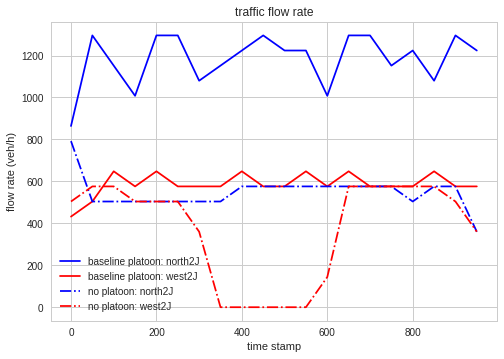

In [121]:
targetId = 'VL_north2J'
targetIdPool = ['VL_north2J', 'VL_west2J']

# baseline platoon
plt.figure()
tmp_df = selectTargetId(platoon_df, 'VL_north2J')
plt.plot(tmp_df['begin'], tmp_df['flow'],'blue')
tmp_df = selectTargetId(platoon_df, 'VL_west2J')
plt.plot(tmp_df['begin'], tmp_df['flow'],'r')
# no platoon
tmp_df = selectTargetId(noplatoon_df, 'VL_north2J')
plt.plot(tmp_df['begin'], tmp_df['flow'],color='blue',linestyle='-.')
tmp_df = selectTargetId(noplatoon_df, 'VL_west2J')
plt.plot(tmp_df['begin'], tmp_df['flow'],'r',linestyle='-.')


plt.xlabel('time stamp')
plt.ylabel('flow rate (veh/h)')
lengend_str = ['baseline platoon: '+x.split('_')[1] for x in targetIdPool]
lengend_str += ['no platoon: '+x.split('_')[1] for x in targetIdPool]
plt.legend(lengend_str)
plt.title('traffic flow rate')
plt.show()

 




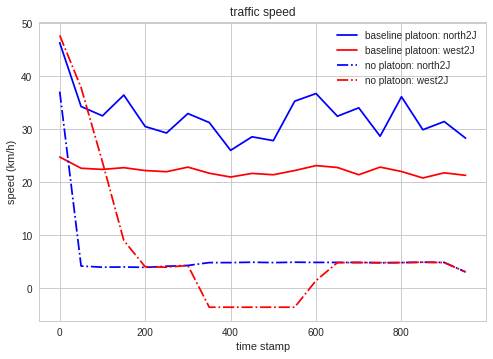

In [122]:
targetId = 'VL_north2J'
targetIdPool = ['VL_north2J', 'VL_west2J']

# baseline platoon
plt.figure()
tmp_df = selectTargetId(platoon_df, 'VL_north2J')
plt.plot(tmp_df['begin'], tmp_df['speed']*3.6,'blue')
tmp_df = selectTargetId(platoon_df, 'VL_west2J')
plt.plot(tmp_df['begin'], tmp_df['speed']*3.6,'r')
# no platoon
tmp_df = selectTargetId(noplatoon_df, 'VL_north2J')
plt.plot(tmp_df['begin'], tmp_df['speed']*3.6,color='blue',linestyle='-.')
tmp_df = selectTargetId(noplatoon_df, 'VL_west2J')
plt.plot(tmp_df['begin'], tmp_df['speed']*3.6,'r',linestyle='-.')


plt.xlabel('time stamp')
plt.ylabel('speed (km/h)')
lengend_str = ['baseline platoon: '+x.split('_')[1] for x in targetIdPool]
lengend_str += ['no platoon: '+x.split('_')[1] for x in targetIdPool]
plt.legend(lengend_str)
plt.title('traffic speed')
plt.show()

